In [2]:
import pandas as pd    
import yfinance as yf 
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import mplfinance as mpf
import numpy as np
import seaborn as sns
import pandas_datareader.data as web
from datetime import datetime, timedelta
from sklearn.cluster import KMeans
from scipy.stats import chi2_contingency
from tabulate import tabulate
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter


In [2]:
SPX500URL='https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
df_spx=pd.read_html(SPX500URL)[0]

In [92]:
spx500 = yf.download('^GSPC', start='1999-01-01', end='2023-02-23')

[*********************100%***********************]  1 of 1 completed


In [4]:
start_date = datetime.now() - timedelta(days=5*365)
end_date = datetime.now()
sectors_data = yf.download(['XLY', 'XLP', 'XLE', 'XLF', 'XLV', 'XLI', 'XLB', 'XLRE', 'XLK', 'XLC'], start=start_date, end=end_date)['Adj Close']


[*********************100%***********************]  10 of 10 completed


In [5]:
sectors_avg_close = sectors_data.groupby(by=sectors_data.index.year).mean()

In [34]:
# Diccionario con las siglas y los nombres completos de los sectores
sectors_names = {'XLY': 'Consumo discrecional', 
                 'XLP': 'Bienes de consumo básicos', 
                 'XLE': 'Energía', 
                 'XLF': 'Servicios financieros', 
                 'XLV': 'Salud', 
                 'XLI': 'Industriales', 
                 'XLB': 'Materiales', 
                 'XLRE': 'Inmobiliario', 
                 'XLK': 'Tecnología', 
                 'XLC': 'Comunicaciones',
                 "XLU":'Servicios Públicos'}



El siguiente gráfico muestra las ganancias de los sectores del índice S&P 500 desde el año 2000 hasta la actualidad. El gráfico representa la variación porcentual del promedio de cierre de cada sector por año y se presenta en formato de barras. Los nombres de los sectores se encuentran en el eje x, mientras que el eje y representa las ganancias en porcentaje, este codigo permite elegir la fecha de los datos historicos. 

[*********************100%***********************]  10 of 10 completed


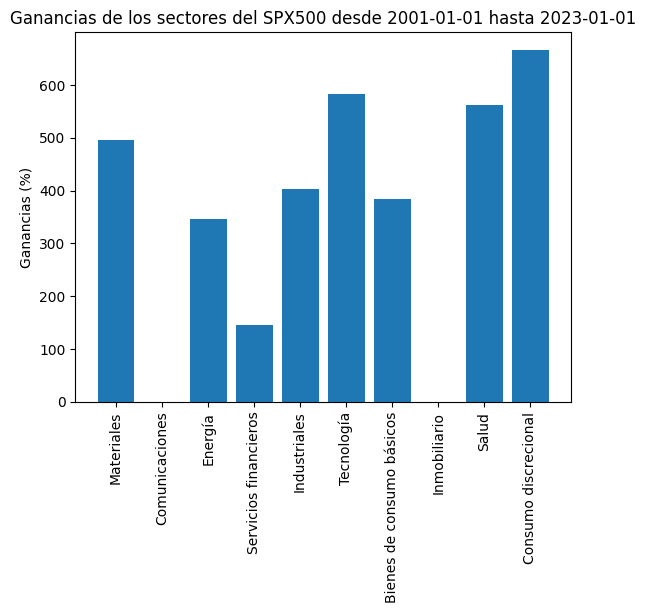

In [29]:

# Pedir al usuario que ingrese la fecha de inicio y fecha final
start_date = input("Ingrese la fecha de inicio (YYYY-MM-DD): ")
end_date = input("Ingrese la fecha final (YYYY-MM-DD): ")

# Descargar datos de yfinance
sectors_data = yf.download(['XLY', 'XLP', 'XLE', 'XLF', 'XLV', 'XLI', 'XLB', 'XLRE', 'XLK', 'XLC'], start=start_date, end=end_date)['Adj Close']

# Calcular el promedio de cierre de cada sector por año
sectors_avg_close = sectors_data.groupby(by=sectors_data.index.year).mean()

# Reemplazar las siglas de los sectores con los nombres completos
sectors_avg_close.columns = sectors_data.columns.map(sectors_names)

# Calcular las ganancias de cada sector
sector_gains = {}
for sector in sectors_avg_close.columns:
    start_value = sectors_avg_close.loc[sectors_avg_close.index.min(), sector]
    end_value = sectors_avg_close.loc[sectors_avg_close.index.max(), sector]
    sector_gains[sector] = (end_value / start_value - 1) * 100

# Crear un gráfico de barras de las ganancias de cada sector
plt.bar(sector_gains.keys(), sector_gains.values())
plt.xticks(rotation=90)
plt.ylabel('Ganancias (%)')
plt.title(f'Ganancias de los sectores del SPX500 desde {start_date} hasta {end_date}')
plt.show()


In [13]:
spx=pd.read_csv('constituents-financials_csv.csv')

In [14]:
# unir dataframes por la columna fecha
spx = pd.merge(spx, df_spx, on=['Symbol',])

In [15]:
spx = spx.drop(['SEC Filings', 'Security', 'GICS Sector', 'Headquarters Location', 'EBITDA'], axis=1)

Este grafico muestra la evolución del precio de cierre del índice S&P 500 en un período de tiempo determinado. El gráfico resultante es una herramienta útil para analizar y comprender los cambios en el valor del índice a lo largo del tiempo.

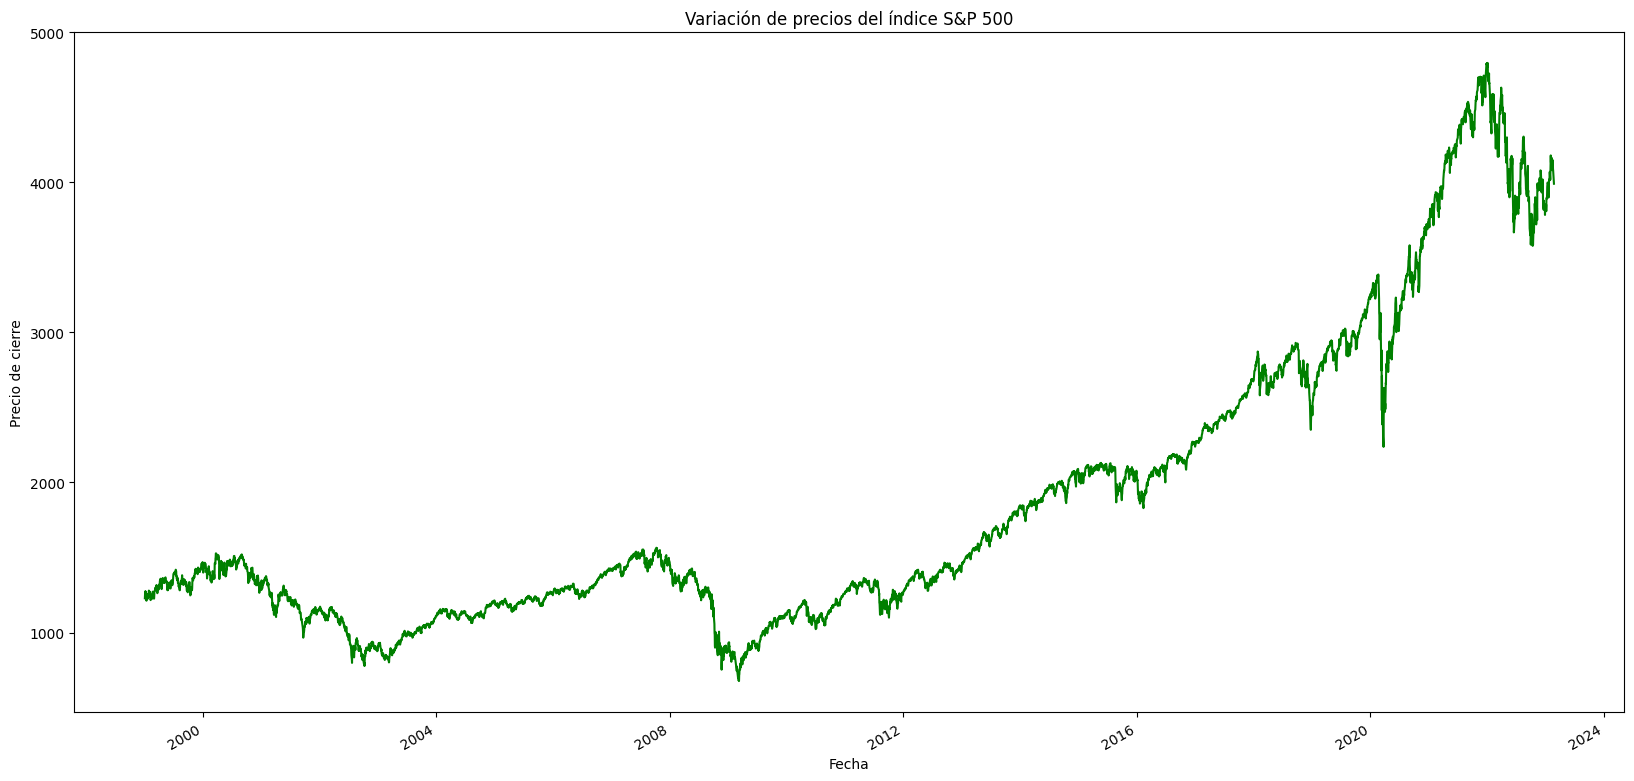

In [20]:
# Creamos el gráfico de la serie temporal
spx500['Close'].plot(figsize=(20,10), color='green')

#plt.plot(spx500.index, spx500['Close'], color='green')

# Añadimos etiquetas y título al gráfico
plt.xlabel('Fecha')
plt.ylabel('Precio de cierre')
plt.title('Variación de precios del índice S&P 500')

# Mostramos el gráfico
plt.show()

El siguiente gráfico de líneas que muestra la volatilidad de 30, 60 y 90 días a lo largo del tiempo. La volatilidad es el eje Y, mientras que el eje X representa la fecha. La leyenda en la parte superior del gráfico indica cuál línea corresponde a cada ventana de tiempo.

La volatilidad es una medida de la variabilidad de los precios de un activo financiero. Los inversores utilizan la volatilidad como una medida del riesgo y la incertidumbre asociados con un activo o un mercado en particular. Una mayor volatilidad implica un mayor riesgo, ya que los precios pueden cambiar más rápidamente y en una mayor magnitud.

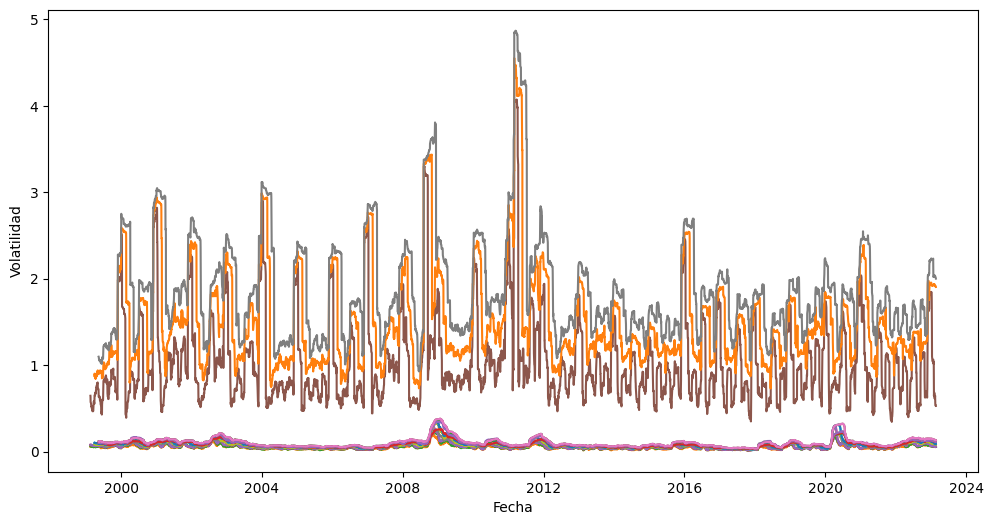

In [30]:
returns = spx500.pct_change()

volatility_30d = returns.rolling(window=30).std() * np.sqrt(30)
volatility_60d = returns.rolling(window=60).std() * np.sqrt(60)
volatility_90d = returns.rolling(window=90).std() * np.sqrt(90)

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(volatility_30d, label='30 días')
ax.plot(volatility_60d, label='60 días')
ax.plot(volatility_90d, label='90 días')


ax.set_xlabel('Fecha')
ax.set_ylabel('Volatilidad')

plt.show()

El gráfico muestra la evolución del precio de cierre del índice a lo largo del tiempo en el eje x, que se encuentra etiquetado como "Fecha", mientras que el precio de cierre se representa en el eje y, etiquetado como "Precio de cierre", la figura generada es una línea que conecta los precios de cierre a lo largo del tiempo

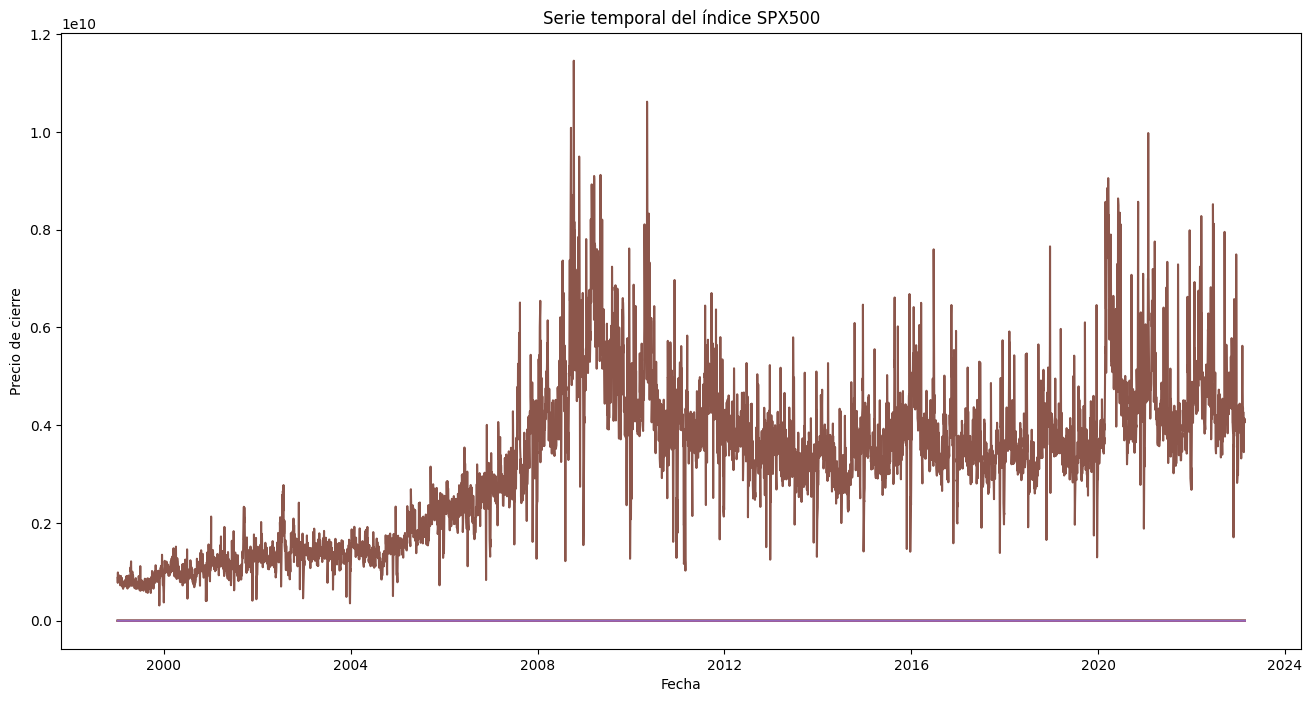

In [31]:

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(16, 8))

# Graficar la serie temporal
ax.plot(spx500)

# Configurar los ejes y la etiqueta del título
ax.set_xlabel('Fecha')
ax.set_ylabel('Precio de cierre')
ax.set_title('Serie temporal del índice SPX500')

# Mostrar la gráfica
plt.show()

Interpretando el gráfico, se puede ver que la distribución de los rendimientos diarios del índice SPX500 se asemeja a una distribución normal, con una media cercana a cero. Hay una mayor frecuencia de rendimientos cercanos a cero, y a medida que los rendimientos se alejan de cero en cualquier dirección, la frecuencia disminuye. También se puede observar que hay algunos valores extremos de rendimiento, que son mucho mayores o menores que la mayoría de los rendimientos.

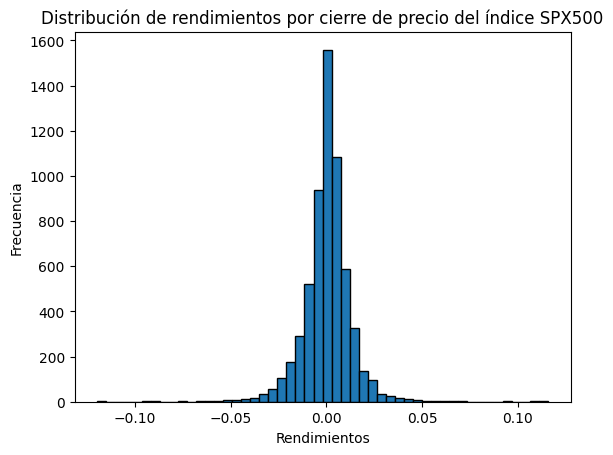

In [32]:
# Calcular los rendimientos diarios
returns = spx500['Close'].pct_change()

# Crear un histograma
plt.hist(returns, bins=50, edgecolor='black')
plt.xlabel('Rendimientos')
plt.ylabel('Frecuencia')
plt.title('Distribución de rendimientos por cierre de precio del índice SPX500')
plt.show()

Aqui obtenemos unas medidas de estadisticas basicas del precio de cierre del SPX500 como la media, la mediana, la desviacion estandar y el rango, estas medidas proporcionan información sobre la tendencia central, la variabilidad y la dispersión de los precios de cierre en un período de tiempo determinado. 

In [33]:
spx500['Close'].pct_change()
media = spx500['Close'].mean()
mediana = spx500['Close'].median()
std = spx500['Close'].std()
rango = spx500['Close'].max() - spx500['Close'].min()
print('Media:', media)
print('Mediana:', mediana)
print('Desviación estándar:', std)
print('Rango:', rango)


Media: 1863.498368440037
Mediana: 1413.5349731445312
Desviación estándar: 962.9656382162707
Rango: 4120.030029296875


In [42]:
sectores = spx['Sector'].value_counts()

Este código genera un gráfico de barras que muestra la distribución de sectores dentro del índice bursátil S&P 500. El primer paso es obtener los datos de las empresas del S&P 500 y agruparlas por sector. Luego, se cuenta la cantidad de empresas en cada sector.

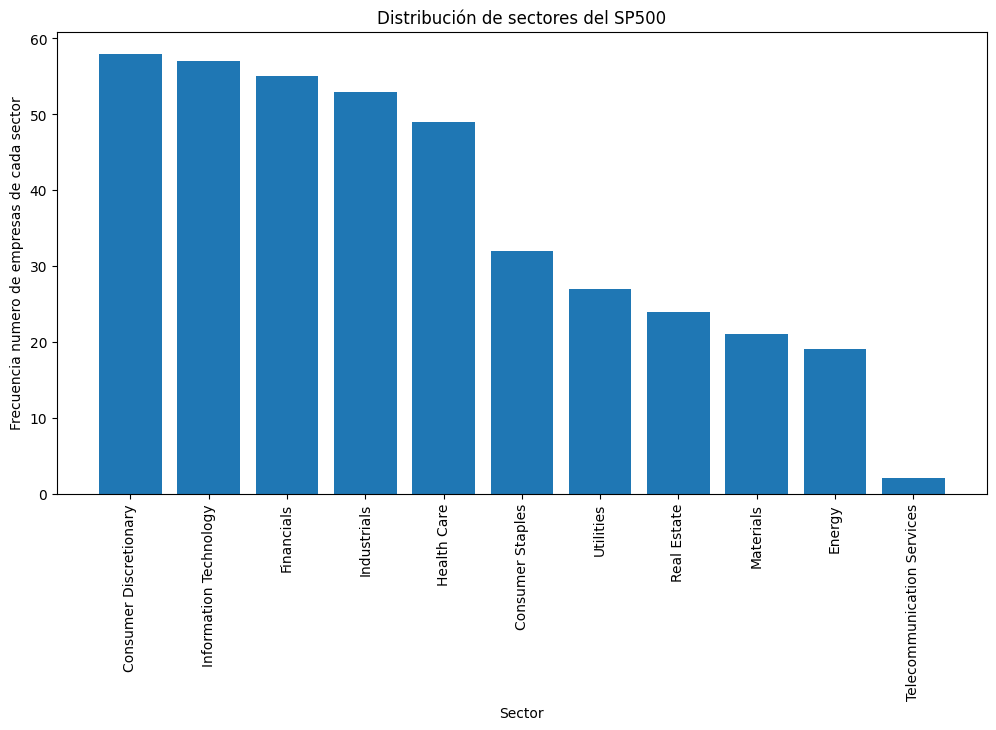

In [43]:
num_sectores = len(sectores)

plt.figure(figsize=(12, 6))
plt.bar(sectores.index, sectores.values)
plt.xlabel('Sector')
plt.ylabel('Frecuencia numero de empresas de cada sector')
plt.title('Distribución de sectores del SP500')
plt.xticks(rotation=90)
plt.show()

In [129]:
# Descargar los datos de los sectores del SPX500 utilizando yfinance
sectors = ["XLV", "XLU", "XLP", "XLE", "XLF", "XLI", "XLB", "XLRE", "XLK", "XLY"]
sector_data = yf.download(sectors, start='2000-01-01', end='2023-03-01', group_by='ticker')

[*********************100%***********************]  10 of 10 completed


In [130]:
sector_data.dropna(inplace=True)
sector_gains = {}
for sector in sectors:
    sector_gains[sector] = ((sector_data[sector]['Adj Close'][-1] - sector_data[sector]['Adj Close'][0]) / sector_data[sector]['Adj Close'][0]) * 100


Aqui mostramos las ganancias de los sectores que componen el spx500 en porcentaje seguido de un grafico de barras para visualizarlo un poco mejor.

In [131]:
# Imprimir las ganancias de cada sector
print("Ganancias de los sectores del SPX500:")
for sector, gain in sector_gains.items():
    print(f"{sector}: {gain:.2f}%")

Ganancias de los sectores del SPX500:
XLV: 110.66%
XLU: 87.20%
XLP: 77.12%
XLE: 65.04%
XLF: 117.16%
XLI: 117.75%
XLB: 114.97%
XLRE: 62.61%
XLK: 263.85%
XLY: 104.37%


C:\Users\Usuario\AppData\Local\Temp\ipykernel_1644\2484239510.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(sector_gains.index, rotation=90, ha='right')


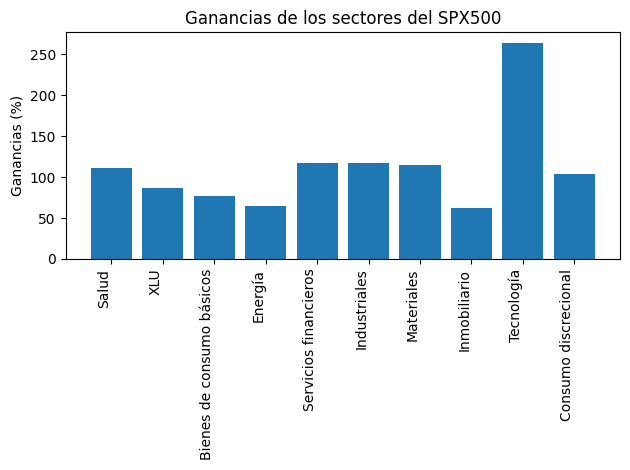

In [136]:
sector_gains_df= sector_gains_df.rename(columns=sectors_names)
data = {'Salud': 110.658028, 'XLU': 87.195233, 'Bienes de consumo básicos': 77.123092,
        'Energía': 65.037446, 'Servicios financieros': 117.162117, 'Industriales': 117.753514,
        'Materiales': 114.970844, 'Inmobiliario': 62.605929, 'Tecnología': 263.845669,
        'Consumo discrecional': 104.365176}
sector_gains = pd.Series(data)

# Crear el gráfico de barras
fig, ax = plt.subplots()
ax.bar(sector_gains.index, sector_gains.values)
ax.set_xticklabels(sector_gains.index, rotation=90, ha='right')
ax.set_ylabel('Ganancias (%)')
ax.set_title('Ganancias de los sectores del SPX500')
plt.tight_layout()
plt.show()

In [139]:
df=pd.read_csv('stockspy.csv')

Aqui mostramos las 10 empresas con mas ganancias teniendo de referencia al sector tecnologico como el sector con mas crecimiento a lo largo del tiempo.

In [138]:
# Primero, calcula la ganancia de cada empresa en el período de tiempo deseado
df['gain'] = (df.iloc[:, -1] - df.iloc[:, 0]) / df.iloc[:, 0] * 100

# calcular la ganancia de cada empresa
gains = ((df.iloc[-1] - df.iloc[0]) / df.iloc[0]) * 100

# encontrar la empresa con la ganancia máxima
max_gain_company = gains.idxmax()

# Seleccionamos las 10 empresas con las mayores ganancias
top_10 = gains.nlargest(10)


# Mostramos las empresas y sus ganancias porcentuales
for stock, gain in top_10.items():
    print(f"{stock:10}\t{gain:.2f}%")

MNST      	113162.99%
ODFL      	35036.08%
TSCO      	27292.79%
NVDA      	25838.30%
AAPL      	17229.24%
IDXX      	11684.96%
NVR       	11011.13%
ANSS      	10877.99%
POOL      	8946.10%
UNH       	8547.93%


En este grafico vemos lo mismo con barras en crecimiento con intervalos en valores de 10.000 unidades tambien en porcentajes observando que la empresa MNST crecio mas del % 100.000 respecto del año 2000 a la actualidad.

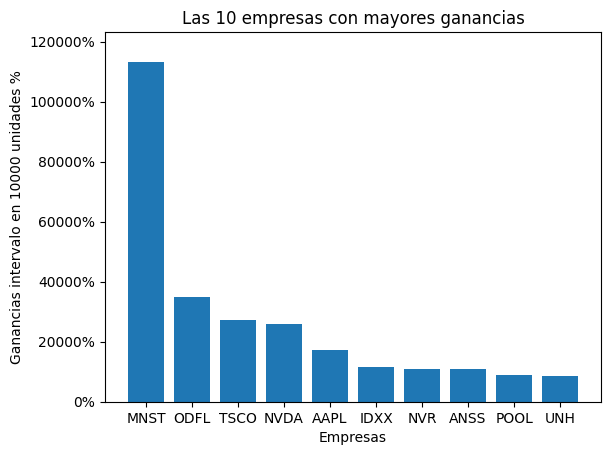

In [140]:
# Seleccionamos las 10 empresas con las mayores ganancias
top_10 = gains.nlargest(10)

# Crear la figura y el eje
fig, ax = plt.subplots()

# Crear el gráfico de barras
ax.bar(top_10.index, top_10)

# Establecer las etiquetas de los ejes y el título
ax.set_xlabel('Empresas')
ax.set_ylabel('Ganancias intervalo en 10000 unidades %')
ax.set_title('Las 10 empresas con mayores ganancias')

# Establecer el intervalo de la escala del eje y en 10000 unidades
ax.set_ylim([0, int(max(top_10))+10000])
# Función de formato para mostrar los valores del eje y como porcentaje
def y_format_percent(x, pos):
    return '{:.0f}%'.format(x)

# Establecer la función de formato en el eje y
ax.yaxis.set_major_formatter(FuncFormatter(y_format_percent))

# Mostrar el gráfico
plt.show()


In [167]:
start = "2000-01-01"
end = "2023-02-25"

mnst = yf.download("MNST", start=start, end=end)
odfl = yf.download("ODFL", start=start, end=end)
tsco = yf.download("TSCO", start=start, end=end)
nvda = yf.download("NVDA", start=start, end=end)
aapl = yf.download("AAPL", start=start, end=end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Teniendo en cuenta la informacion anterior  aqui mostramos un grafico chartista comparando a lo largo del periodo de lo 23 años analizados las empresas comparadas entre si observando su correlacion y similitud en crecimiento y tendencia.

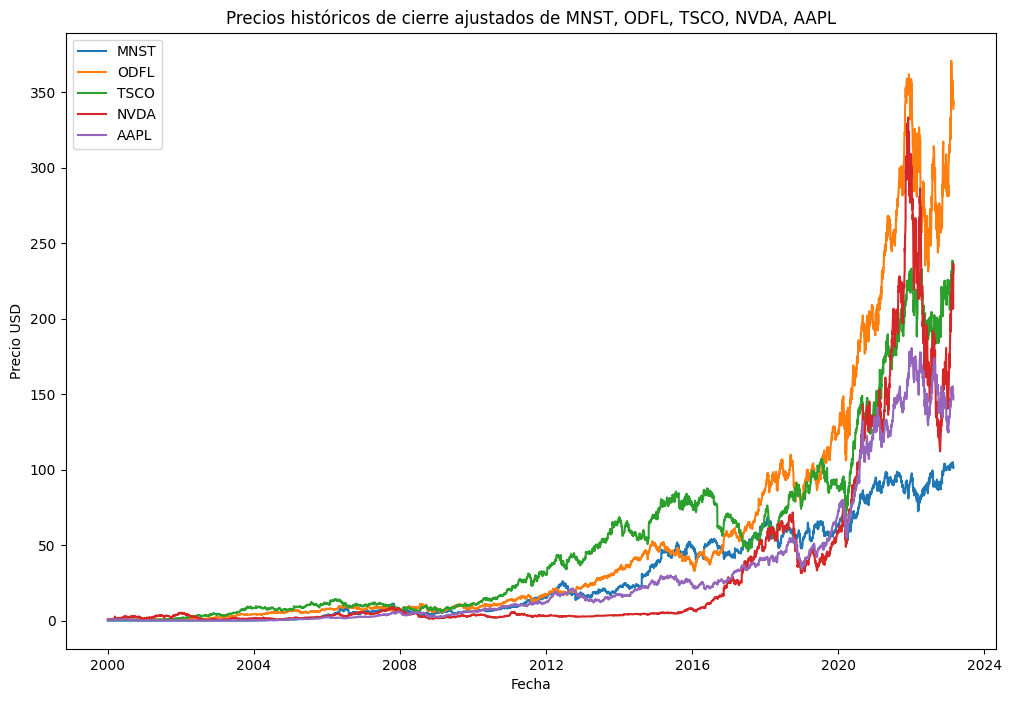

In [168]:
# Visualizar precios de cierre ajustados de las acciones
plt.figure(figsize=(12, 8))
plt.plot(mnst['Adj Close'], label='MNST')
plt.plot(odfl['Adj Close'], label='ODFL')
plt.plot(tsco['Adj Close'], label='TSCO')
plt.plot(nvda['Adj Close'], label='NVDA')
plt.plot(aapl['Adj Close'], label='AAPL')
plt.legend()
plt.title('Precios históricos de cierre ajustados de MNST, ODFL, TSCO, NVDA, AAPL')
plt.xlabel('Fecha')
plt.ylabel('Precio USD')
plt.show()


Se visualizan los resultados de la regresión lineal con un scatter plot (puntos) y una línea de regresión lineal ajustada a los datos. La línea de regresión se traza utilizando la función predict() del modelo de regresión lineal. El gráfico muestra la relación entre el P/E ratio y el precio de las acciones del S&P 500. La línea de regresión indica cómo el precio de las acciones se relaciona con el P/E ratio y se puede utilizar para hacer predicciones.

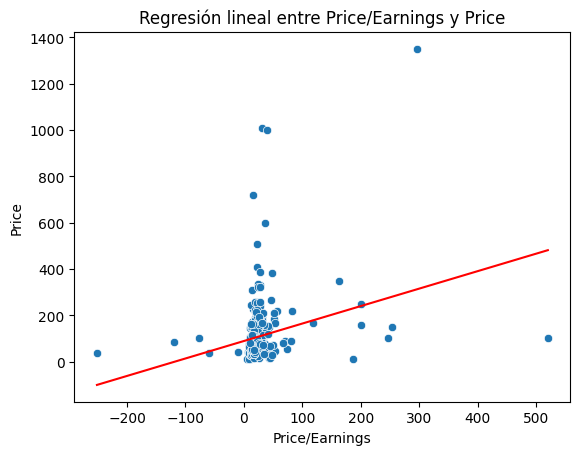

In [169]:
# Seleccionamos las variables numéricas
spxdrona = SPX.dropna()
# Definimos las variables X e y
X = spxdrona[['Price/Earnings']]
y = spxdrona['Price']

# Ajustamos un modelo de regresión lineal
model = LinearRegression()
model.fit(X, y)

# Visualizar los resultados con un scatter plot y la recta de regresión
sns.scatterplot(x=spxdrona['Price/Earnings'], y=spxdrona['Price'])
sns.lineplot(x=spxdrona['Price/Earnings'], y=model.predict(X), color='red')
plt.xlabel('Price/Earnings')
plt.ylabel('Price')
plt.title('Regresión lineal entre Price/Earnings y Price')
plt.show()

Este código implementa un modelo de clustering K-means sobre un conjunto de datos de empresas del índice SPX500, este análisis nos permite identificar patrones y relaciones entre las empresas, y agruparlas en función de sus características económicas y financieras. Por ejemplo, las empresas que se agrupan en el mismo cluster pueden tener características similares en términos de capitalización de mercado, ratio precio-ganancias, precio sobre el valor contable, rendimiento de dividendos, entre otros. Esta información puede ser útil para tomar decisiones de inversión o para entender cómo están relacionadas las empresas entre sí.

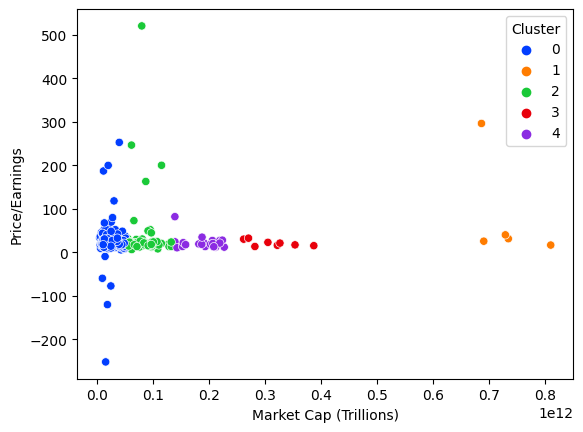

In [103]:
num_vars = ['Market Cap', 'Price', 'Price/Earnings', 'Price/Book', 'Dividend Yield']

# Seleccionamos las empresas que tienen valores completos para todas las variables
spx_clean = SPX[num_vars].dropna()


# Imputamos los valores faltantes con la media de cada variable
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(spx_clean)

# Normalizamos los datos
X_norm = (X - X.mean()) / X.std()

# Entrenamos el modelo de clustering con k=5
kmeans = KMeans(n_clusters=5, random_state=0, n_init=10).fit(X_norm)

# Renombrar el eje x
plt.xlabel('Market Cap (Trillions)')

# Especificar que se muestren los números en trillones
plt.ticklabel_format(style='sci', axis='x', scilimits=(12, 12))


# Asignamos cada empresa a su correspondiente cluster
spx_clean["Cluster"] = kmeans.predict(X_norm)
sns.scatterplot(data=spx_clean, x="Market Cap", y="Price/Earnings", hue="Cluster",palette='bright'
)
plt.show()


Este gráfico muestra la relación entre la capitalización de mercado y el precio / ganancias de las empresas en el índice S&P 500. Cada punto en el gráfico representa una empresa en el índice, y su ubicación en el gráfico se determina por sus valores de capitalización de mercado y precio / ganancias. Los puntos están coloreados según el grupo al que se asignó la empresa después de aplicar un algoritmo de clustering.


In [104]:
#Aqui identificamos las empresas de cada closter con su respectivo numero.
spx_clean['Name']=SPX['Name']
def cluster(spx_clean, cluster_num):
    cluster_df = spx_clean[spx_clean['Cluster'] == cluster_num]
    if cluster_df.empty:
        print(f"No hay empresas en el cluster {cluster_num}")
    else:
        print(f"Empresas en el cluster {cluster_num}:")
        print(cluster_df[['Name', 'Cluster']])



Aqui podemos selecionar el cluster y saber que empresas pertenece a cada uno.

In [107]:
cluster(spx_clean, 1)


Empresas en el cluster 1:
                     Name  Cluster
21   Alphabet Inc Class A        1
22   Alphabet Inc Class C        1
24         Amazon.com Inc        1
41             Apple Inc.        1
248       Microsoft Corp.        1
